In [10]:
%matplotlib inline

In [11]:
import tifffile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision_multi import transform_multi
from torchvision_multi.datasets import image_loader

this module is design for multi-channel image tranform of pytorch. for now all the input image should be numpy.ndarray.

there are three way to use this module.

1. independence use: you can use the function or class independently.
2. input transform: purpose for image classification
    - single label classification
    - multi label classification
3. input and target transform simultaneously: purpose for image semantic segmentation and instance segmentation


## 1. Independence Use
you can use this module independence 

In [12]:
# loading data and show the original image
img_tif = tifffile.imread('./sample-data/7-channel.tif')
img_jpg = Image.open('./sample-data/2007_000129.jpg')
# img_tif = img_tif.astype(np.float, copy=False) # covert the original image float32 to uint32

(<matplotlib.figure.Figure at 0x7f266c6da7b8>,
 <matplotlib.image.AxesImage at 0x7f266c40f7f0>)

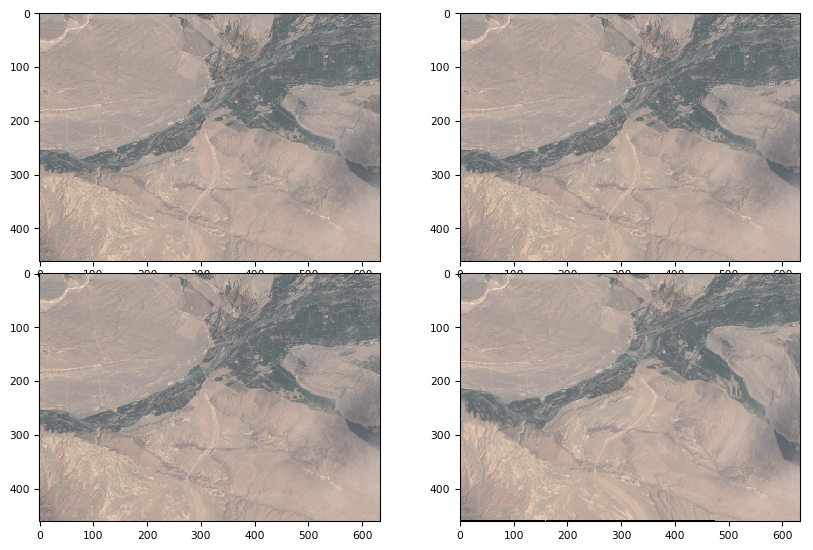

In [13]:
#flip the image and the plot them
fig = plt.figure(figsize=(16,8))
img_tif_flip = transform_multi.flip(img_tif, -1)
img_tif_rotate = transform_multi.rotate(img_tif, 45)
img_tif_shift = transform_multi.shift(img_tif,30,30)
# img_tif_crop = transform_multi.randomcrop(img_tif,(200,200))
# img_tif_addnoise = transform_multi.noise(img_tif)
# img_tif_gaussianblur = transform_multi.gaussianblur(img_tif,sigma=2)
img_tif_piecewise = transform_multi.piecetransform(img_tif,numcols=5, numrows=5, warp_left_right=50, warp_up_down=50)

tifffile.imshow(img_tif[:,:,[3,2,1]], subplot=221)  #original
tifffile.imshow(img_tif[:,:,[3,2,1]], figure=fig,subplot=222)
tifffile.imshow(img_tif[:,:,[3,2,1]], figure=fig,subplot=223)

# tifffile.imshow(img_tif_flip[:,:,[3,2,1]], figure=fig, subplot=222) 
# tifffile.imshow(img_tif_rotate[:,:,[3,2,1]], figure=fig, subplot=223) 
# tifffile.imshow(img_tif_shift[:,:,[3,2,1]], figure=fig, subplot=224)
# tifffile.imshow(img_tif_crop[:,:,[3,2,1]], figure=fig, subplot=224)
# tifffile.imshow(img_tif_gaussianblur[:,:,[3,2,1]], figure=fig, subplot=224)
tifffile.imshow(img_tif_piecewise[:,:,[3,2,1]], figure=fig, subplot=224)

## 2. input transform
purpose for image classification
 - single label classification
 - multi label classification

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader

0.9 0.5
0.1 0.5
0.5 0.5
0.2 0.5
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691


0.6 0.5
0.8 0.5
0.6 0.5
0.8 0.5
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691


0.7 0.5
0.0 0.5
0.1 0.5
0.4 0.5
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691




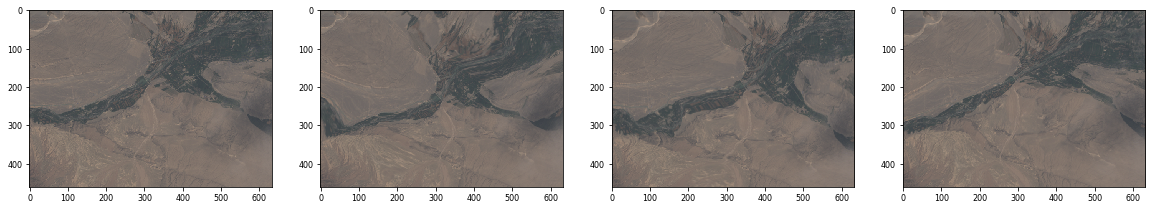

In [19]:
fig = plt.figure(figsize=(20,6))

batch_size=4
transform = transform_multi.Compose([
#     transform_multi.RandomRotate(0.5),
#     transform_multi.RandomShift(0.5, 30, 30),
#     transform_multi.RandomCrop((200,200)),
    transform_multi.PieceTransfor(0.5,5,5,50,50),
    transform_multi.Lambda(lambda x: transform_multi.to_tensor(x))
])

trainset = image_loader.SingleLabelImageLoader(
    root='./sample-data/', lstpath='./sample-data/parse_single_lstfile_tiff.lst',
    filetype='tif', transform=transform,
    )
trainloader = DataLoader(dataset=trainset,batch_size=batch_size,shuffle=False)

for step, (inputs, targets) in enumerate(trainloader):
#     print('batch: {} ........'.format(idx))
#     print(type(images), images.shape)
#     print(type(targets), targets.shape)
    
    # Variable, cuda
    # net feed forward
    # loss
    # back propagation
     
    #plot
    for idx, item in enumerate(inputs):
        item = torch.squeeze(item,0)
        img_ndarr = transform_multi.to_ndarray(item)
        subplot = int(''.join(str(x) for x in [1, batch_size, idx+1]))
        print(type(img_ndarr), img_ndarr.size)
        tifffile.imshow(img_ndarr[:,:,[3,2,1]], figure=fig, subplot=subplot)  
    plt.savefig('./sample-data/plot/{}.png'.format(step), bbox_inches='tight')
    print('\n')


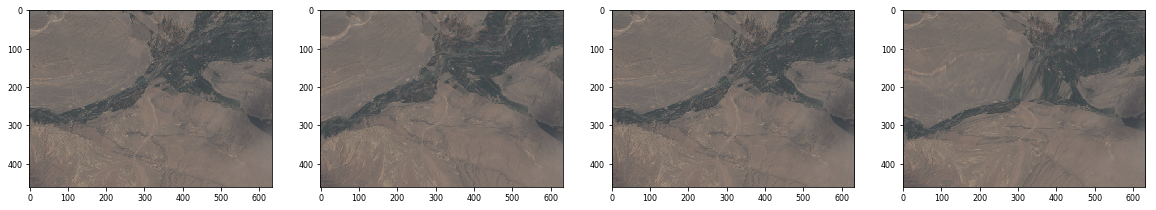

In [20]:
from IPython.display import Image
Image("sample-data/plot/0.png")

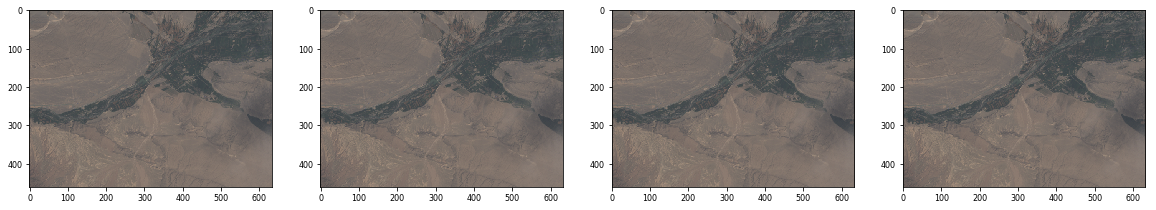

In [21]:
Image("sample-data/plot/1.png")

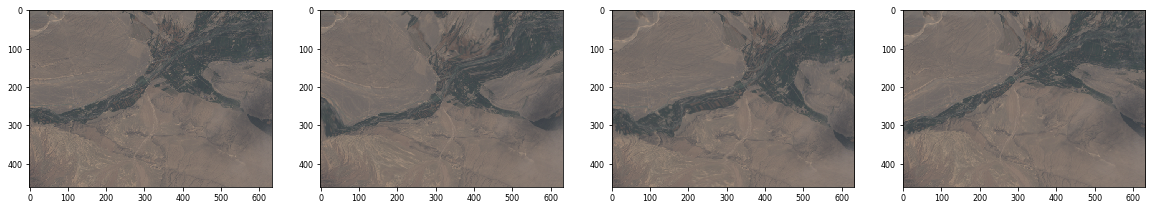

In [22]:
Image("sample-data/plot/2.png")

---

## 3. input and target transform simultaneously

purpose for image semantic segmentation and instance segmentation